<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/MLG_D2_LC2_Regularization_of_Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Regularization of Regression models (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>


<strong>Topics Trained:</strong> Lasso and Ridge Regression, effect of alpha values</p>

# Regularization of Regression models (Live coding)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression

__Load data__

In [2]:
# boston.csv
gdrive_data_url = "https://drive.google.com/file/d/1cnIxAAqXnG9vHO59EuRBbnit_3rM_UOT/view?usp=share_link"
file_id = gdrive_data_url.split('/')[-2]
data_file='https://drive.google.com/uc?export=download&id=' + file_id
df = pd.read_csv(data_file)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.columns = df.columns.str.upper()
df.rename(columns={'BLACK':'B', 'MEDV':'PRICE'}, inplace=True)
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


__Train and test split__

In [3]:
X = df.drop(columns='PRICE')
y = df.PRICE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train.shape, X_test.shape

((455, 13), (51, 13))

## Ridge Regression

__Pipeline__

<span style="color:orange">Now that we have loaded and split the data into train and test, we will create a pipeline to scale the data and apply the Ridge regularization technique.</span>

In [4]:
sc = StandardScaler()
ridge_regr = Ridge()

pipeline_ridge = Pipeline([("data_scaling", sc),
                           ("estimator", ridge_regr)])


pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()), ('estimator', Ridge())])

In [5]:
ridge_regr.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

<span style="color:orange">What does our intercept look like?</span>

In [6]:
model = pipeline_ridge.named_steps["estimator"]
model

Ridge()

In [7]:
model.intercept_,

(22.124835164835165,)

<span style="color:orange">Lets look at the coefficients as well</span>

In [8]:
coefs = model.coef_
pd.DataFrame({
    'Feature': X_train.columns,
    'Coef': coefs
})

,Feature,Coef
0,CRIM,-0.998585
1,ZN,1.256067
2,INDUS,-0.036044
3,CHAS,0.817951
4,NOX,-1.795664
5,RM,2.505756
6,AGE,-0.076617
7,DIS,-3.171307
8,RAD,2.459761
9,TAX,-1.847486


__Using different alpha values__

<span style="color:orange">Are you still a bit lost about Ridge regression and its Alpha value? Lets take a quick look at what it is.</span>


Ridge and Lasso regression are basically regularization techniques. This means that it uses different parameters and values to shrink or penalize the coefficients.

When we fit a model, we are asking it to learn a set of coefficients that best fit over the training distribution as well as hope to generalize on test data points as well. Learning those coefficients can be done in various ways and multiple techniques are there to reduce the error in coefficients such as LMS(Least mean Squared), RSS(Residual Sum of Squares).

Now suppose we are training a model using either LMS or RSS, then ridge regression makes use of the extra term which penalizes the results of LMS or RSS towards zero.

__Thats great and all but what the heck is Alpha!?__

Well, Ridge term includes the alpha term, which is nothing but the penalty or the tuning parameter.

The alpha term acts as the control parameter, which determines, how much significance should be given to the features for given its corresponding coefficients. If Alpha is close to zero, the Ridge term itself is very small and thus the final error is based on RSS alone. If Alpha is too large, the impact of shrinkage grows and the coefficients tends to zero.

Choosing the right value helps the model learn the right features and better generalize the coefficients.

<span style="color:orange">Now, lets finally implement different alpha values to see its effect on our features.</span>

In [9]:
alphas = [0.001, 0.01, 1, 10, 100]
alphas

[0.001, 0.01, 1, 10, 100]

In [10]:
1e-05

1e-05

In [11]:
1e6

1000000.0

In [12]:
alphas = np.logspace(-5, 6, num=101)
alphas

array([1.00000000e-05, 1.28824955e-05, 1.65958691e-05, 2.13796209e-05,
       2.75422870e-05, 3.54813389e-05, 4.57088190e-05, 5.88843655e-05,
       7.58577575e-05, 9.77237221e-05, 1.25892541e-04, 1.62181010e-04,
       2.08929613e-04, 2.69153480e-04, 3.46736850e-04, 4.46683592e-04,
       5.75439937e-04, 7.41310241e-04, 9.54992586e-04, 1.23026877e-03,
       1.58489319e-03, 2.04173794e-03, 2.63026799e-03, 3.38844156e-03,
       4.36515832e-03, 5.62341325e-03, 7.24435960e-03, 9.33254301e-03,
       1.20226443e-02, 1.54881662e-02, 1.99526231e-02, 2.57039578e-02,
       3.31131121e-02, 4.26579519e-02, 5.49540874e-02, 7.07945784e-02,
       9.12010839e-02, 1.17489755e-01, 1.51356125e-01, 1.94984460e-01,
       2.51188643e-01, 3.23593657e-01, 4.16869383e-01, 5.37031796e-01,
       6.91830971e-01, 8.91250938e-01, 1.14815362e+00, 1.47910839e+00,
       1.90546072e+00, 2.45470892e+00, 3.16227766e+00, 4.07380278e+00,
       5.24807460e+00, 6.76082975e+00, 8.70963590e+00, 1.12201845e+01,
      

In [13]:
1e6

1000000.0

In [14]:
0.00001

1e-05

In [15]:
pipeline_ridge['estimator']

Ridge()

In [16]:
pipeline_ridge['estimator'].get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [17]:
pipeline_ridge

Pipeline(steps=[('data_scaling', StandardScaler()), ('estimator', Ridge())])

In [18]:
len(alphas)

101

In [19]:
coefs = []
rscore_test = []
rscore_train = []
rscore_cv = []

for a in alphas: # run this experiment to train a total of 100 ridge regression models; each model will use a different value of alpha
    # we set the parameter of alpha to 'a'. Yes, the pipeline automatically does this for us. :)
    pipeline_ridge.set_params(estimator__alpha=a)
    # we fit pipelin to our training data
    pipeline_ridge.fit(X_train, y_train)
    # and append the default score to a list
    rscore_train.append(pipeline_ridge.score(X_train, y_train))
    rscore_cv.append(np.mean(cross_val_score(pipeline_ridge, X_train, y_train, cv=3)))
    # we do the same for our test data
    coefs.append(pipeline_ridge.named_steps["estimator"].coef_)
    rscore_test.append(pipeline_ridge.score(X_test, y_test))

__Visualization__

<span style="color:orange">Lets look at the effects of Alpha on our features</span>

In [20]:
alphas[:5]

array([1.00000000e-05, 1.28824955e-05, 1.65958691e-05, 2.13796209e-05,
       2.75422870e-05])

In [21]:
coefs[:5]

[array([-1.00765149,  1.27343844, -0.0150535 ,  0.81495178, -1.82420769,
         2.49634002, -0.07100316, -3.20433466,  2.53201064, -1.9147438 ,
        -1.78987726,  0.99262995, -3.80829404]),
 array([-1.00765147,  1.27343839, -0.01505356,  0.81495179, -1.82420761,
         2.49634004, -0.07100318, -3.20433456,  2.53201042, -1.9147436 ,
        -1.78987724,  0.99262995, -3.808294  ]),
 array([-1.00765143,  1.27343832, -0.01505364,  0.8149518 , -1.8242075 ,
         2.49634008, -0.0710032 , -3.20433443,  2.53201015, -1.91474334,
        -1.78987721,  0.99262995, -3.80829395]),
 array([-1.00765139,  1.27343824, -0.01505375,  0.81495182, -1.82420736,
         2.49634013, -0.07100323, -3.20433428,  2.53200979, -1.91474301,
        -1.78987718,  0.99262994, -3.80829388]),
 array([-1.00765133,  1.27343813, -0.01505388,  0.81495184, -1.82420718,
         2.49634019, -0.07100326, -3.20433407,  2.53200933, -1.91474258,
        -1.78987714,  0.99262994, -3.80829379])]

In [22]:
alphas[-5:]

array([ 363078.0547701 ,  467735.1412872 ,  602559.58607436,
        776247.11662869, 1000000.        ])

In [23]:
coefs[-5:]

[array([-0.00437306,  0.00415597, -0.005419  ,  0.00207648, -0.00478106,
         0.00764022, -0.00429572,  0.00286988, -0.00415974, -0.00512148,
        -0.00543924,  0.00373144, -0.00827061]),
 array([-0.00340016,  0.00323168, -0.00421408,  0.00161235, -0.00371855,
         0.00593604, -0.00334121,  0.00223438, -0.00323587, -0.00398293,
        -0.00422735,  0.00290092, -0.00642754]),
 array([-0.00264275,  0.00251198, -0.00327576,  0.00125188, -0.00289091,
         0.00461106, -0.00259764,  0.00173845, -0.002516  , -0.00309621,
        -0.00328458,  0.00225449, -0.00499389]),
 array([-0.00205347,  0.00195197, -0.00254557,  0.00097195, -0.00224671,
         0.00358127, -0.00201885,  0.00135189, -0.00195555, -0.00240613,
        -0.00255153,  0.00175164, -0.00387923]),
 array([-0.00159523,  0.00151645, -0.00197766,  0.00075458, -0.0017456 ,
         0.00278113, -0.00156859,  0.00105086, -0.00151951, -0.00186938,
        -0.00198175,  0.00136068, -0.0030129 ])]

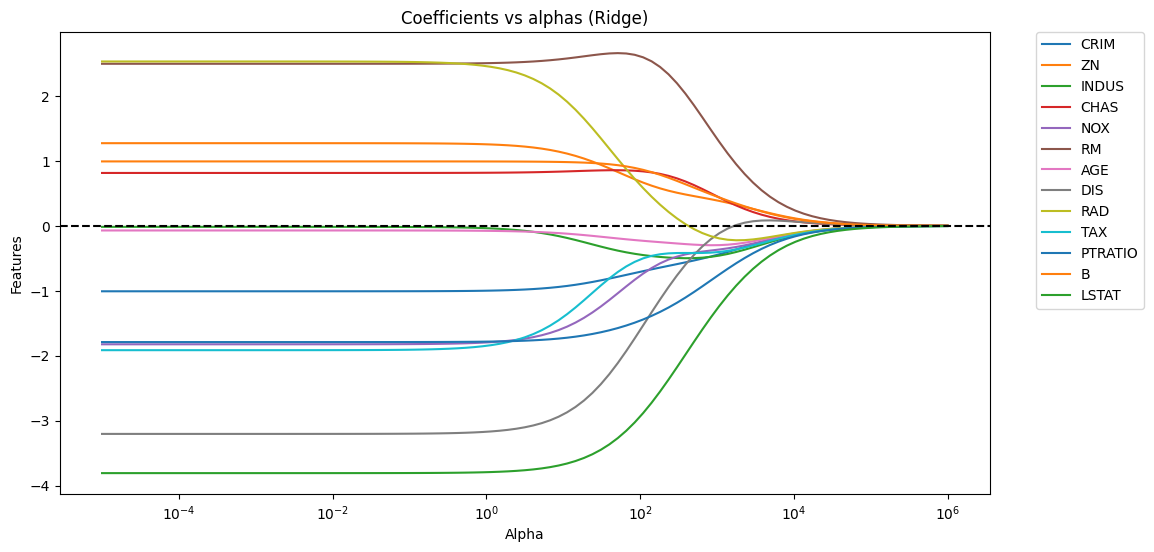

In [24]:
plt.subplots(figsize=[12,6])
plt.plot(alphas, coefs)
plt.xscale("log")    # we apply log scale to have a better view
plt.title("Coefficients vs alphas (Ridge)")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Features")
plt.legend(labels=df.columns[:-1], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(False);

<span style="color:orange">We then store all of our finding in a dataframe</span>

In [25]:
df_coefs = pd.DataFrame(coefs)
df_coefs.columns = df.iloc[:, :-1].columns.values

df_coefs.insert(0, "train_score", rscore_train)
df_coefs.insert(0, "cv_score", rscore_cv)
df_coefs.insert(0, "test_score", rscore_test)
df_coefs.insert(0, "alpha", alphas)

df_coefs.head()

,alpha,test_score,cv_score,train_score,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000010,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015053,0.814952,-1.824208,2.49634,-0.071003,-3.204335,2.532011,-1.914744,-1.789877,0.99263,-3.808294
1,0.000013,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824208,2.49634,-0.071003,-3.204335,2.532010,-1.914744,-1.789877,0.99263,-3.808294
2,0.000017,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824207,2.49634,-0.071003,-3.204334,2.532010,-1.914743,-1.789877,0.99263,-3.808294
3,0.000021,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824207,2.49634,-0.071003,-3.204334,2.532010,-1.914743,-1.789877,0.99263,-3.808294
4,0.000028,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824207,2.49634,-0.071003,-3.204334,2.532009,-1.914743,-1.789877,0.99263,-3.808294


In [26]:
df_coefs.tail()

,alpha,test_score,cv_score,train_score,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
96,363078.054770,-0.158516,0.002088,0.006581,-0.004373,0.004156,-0.005419,0.002076,-0.004781,0.007640,-0.004296,0.002870,-0.004160,-0.005121,-0.005439,0.003731,-0.008271
97,467735.141287,-0.160065,0.001113,0.005120,-0.003400,0.003232,-0.004214,0.001612,-0.003719,0.005936,-0.003341,0.002234,-0.003236,-0.003983,-0.004227,0.002901,-0.006428
98,602559.586074,-0.161272,0.000355,0.003981,-0.002643,0.002512,-0.003276,0.001252,-0.002891,0.004611,-0.002598,0.001738,-0.002516,-0.003096,-0.003285,0.002254,-0.004994
99,776247.116629,-0.162212,-0.000235,0.003095,-0.002053,0.001952,-0.002546,0.000972,-0.002247,0.003581,-0.002019,0.001352,-0.001956,-0.002406,-0.002552,0.001752,-0.003879
100,1000000.000000,-0.162943,-0.000694,0.002405,-0.001595,0.001516,-0.001978,0.000755,-0.001746,0.002781,-0.001569,0.001051,-0.001520,-0.001869,-0.001982,0.001361,-0.003013


<span style="color:orange">Using the semilog plot function from matplotlib, we can see the effects of alpha on our training and testing data</span>

Text(0, 0.5, 'R2 score')

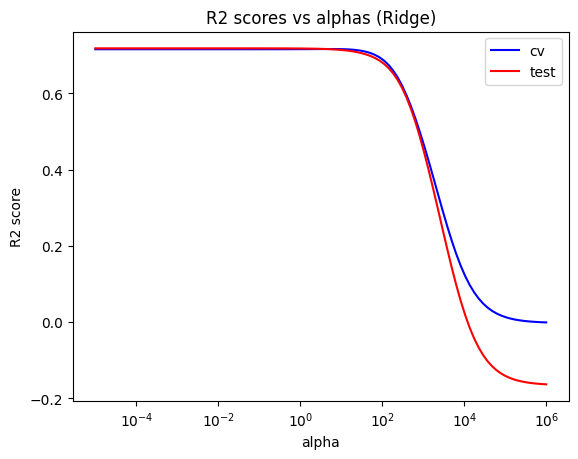

In [27]:
plt.semilogx(df_coefs["alpha"], df_coefs["cv_score"], color="blue", label="cv")
plt.semilogx(df_coefs["alpha"], df_coefs["test_score"], color="red", label="test")

plt.title("R2 scores vs alphas (Ridge)")
plt.xlabel("alpha")
plt.legend()
plt.ylabel("R2 score")

In [28]:
df_coefs[df_coefs['cv_score'] == df_coefs['cv_score'].max()]

,alpha,test_score,cv_score,train_score,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
52,5.248075,0.715329,0.715793,0.736551,-0.96439,1.189915,-0.110451,0.828493,-1.684836,2.540532,-0.097406,-3.03887,2.196241,-1.607512,-1.755717,0.987976,-3.735733


In [29]:
df_coefs[df_coefs['alpha'] < 5.248075].head()

,alpha,test_score,cv_score,train_score,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000010,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015053,0.814952,-1.824208,2.49634,-0.071003,-3.204335,2.532011,-1.914744,-1.789877,0.99263,-3.808294
1,0.000013,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824208,2.49634,-0.071003,-3.204335,2.532010,-1.914744,-1.789877,0.99263,-3.808294
2,0.000017,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824207,2.49634,-0.071003,-3.204334,2.532010,-1.914743,-1.789877,0.99263,-3.808294
3,0.000021,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824207,2.49634,-0.071003,-3.204334,2.532010,-1.914743,-1.789877,0.99263,-3.808294
4,0.000028,0.717619,0.715195,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824207,2.49634,-0.071003,-3.204334,2.532009,-1.914743,-1.789877,0.99263,-3.808294


## Lasso Regression

#### Train the model

In [30]:
sc = StandardScaler()
lasso_regr = Lasso()

pipeline_lasso = Pipeline([("data_scaling", sc),
                           ("estimator", lasso_regr)])


pipeline_lasso.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()), ('estimator', Lasso())])

In [31]:
pipeline_lasso.named_steps["estimator"].get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

#### Look at the coefficients

In [32]:
pipeline_lasso.named_steps["estimator"].intercept_,

(22.124835164835165,)

In [33]:
coefs = pipeline_lasso.named_steps["estimator"].coef_
pd.DataFrame({
    'Feature': X_train.columns,
    'Coef': coefs
})

,Feature,Coef
0,CRIM,-0.000000
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,0.115250
4,NOX,-0.000000
5,RM,2.524818
6,AGE,-0.000000
7,DIS,-0.000000
8,RAD,-0.000000
9,TAX,-0.000000


### Effects of Alpha on Regularization

In [34]:
alphas = np.logspace(-5, 6, num=101)
alphas

array([1.00000000e-05, 1.28824955e-05, 1.65958691e-05, 2.13796209e-05,
       2.75422870e-05, 3.54813389e-05, 4.57088190e-05, 5.88843655e-05,
       7.58577575e-05, 9.77237221e-05, 1.25892541e-04, 1.62181010e-04,
       2.08929613e-04, 2.69153480e-04, 3.46736850e-04, 4.46683592e-04,
       5.75439937e-04, 7.41310241e-04, 9.54992586e-04, 1.23026877e-03,
       1.58489319e-03, 2.04173794e-03, 2.63026799e-03, 3.38844156e-03,
       4.36515832e-03, 5.62341325e-03, 7.24435960e-03, 9.33254301e-03,
       1.20226443e-02, 1.54881662e-02, 1.99526231e-02, 2.57039578e-02,
       3.31131121e-02, 4.26579519e-02, 5.49540874e-02, 7.07945784e-02,
       9.12010839e-02, 1.17489755e-01, 1.51356125e-01, 1.94984460e-01,
       2.51188643e-01, 3.23593657e-01, 4.16869383e-01, 5.37031796e-01,
       6.91830971e-01, 8.91250938e-01, 1.14815362e+00, 1.47910839e+00,
       1.90546072e+00, 2.45470892e+00, 3.16227766e+00, 4.07380278e+00,
       5.24807460e+00, 6.76082975e+00, 8.70963590e+00, 1.12201845e+01,
      

In [35]:
lasso_regr

Lasso()

In [36]:
coefs = []
rscore_test = []
rscore_train = []

for a in alphas:
    # we set the parameter of alpha to 'a'. Yes, the pipeline automatically does this for us. :)
    pipeline_lasso.set_params(estimator__alpha=a)
    # we fit pipelin to our training data
    pipeline_lasso.fit(X_train, y_train)
    # and append the default score to a list
    rscore_train.append(pipeline_lasso.score(X_train, y_train))
    # we do the same for our test data
    coefs.append(pipeline_lasso.named_steps["estimator"].coef_)
    rscore_test.append(pipeline_lasso.score(X_test, y_test))

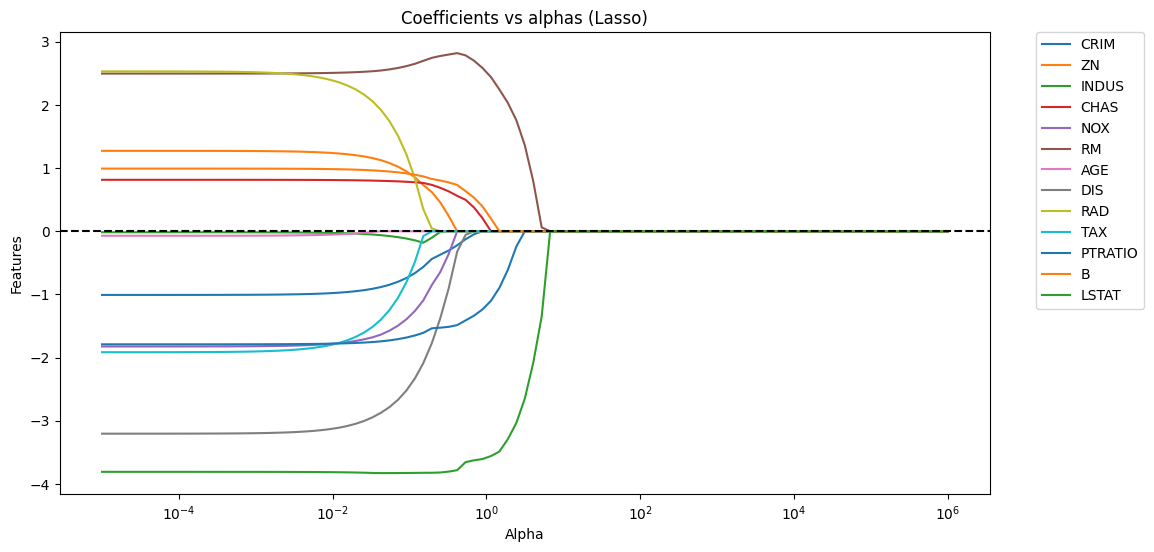

In [37]:
plt.subplots(figsize=[12,6])
plt.plot(alphas, coefs)
plt.xscale("log")    # we apply log scale to have a better view
plt.title("Coefficients vs alphas (Lasso)")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Features")
plt.legend(labels=df.columns[:-1], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(False);

In [38]:
df_coefs = pd.DataFrame(coefs)
df_coefs.columns = df.iloc[:, :-1].columns.values

df_coefs.insert(0, "train_score", rscore_train)
df_coefs.insert(0, "test_score", rscore_test)
df_coefs.insert(0, "alpha", alphas)

df_coefs.head()

,alpha,test_score,train_score,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000010,0.717618,0.736879,-1.007622,1.273404,-0.015065,0.814948,-1.824164,2.496351,-0.070985,-3.204257,2.531866,-1.914621,-1.789866,0.992621,-3.808299
1,0.000013,0.717618,0.736879,-1.007613,1.273394,-0.015069,0.814947,-1.824151,2.496355,-0.070980,-3.204234,2.531825,-1.914586,-1.789863,0.992619,-3.808301
2,0.000017,0.717618,0.736879,-1.007603,1.273381,-0.015073,0.814945,-1.824135,2.496359,-0.070973,-3.204205,2.531771,-1.914541,-1.789859,0.992615,-3.808303
3,0.000021,0.717618,0.736879,-1.007588,1.273365,-0.015079,0.814944,-1.824113,2.496364,-0.070964,-3.204168,2.531702,-1.914482,-1.789853,0.992611,-3.808306
4,0.000028,0.717618,0.736879,-1.007570,1.273343,-0.015086,0.814941,-1.824086,2.496371,-0.070953,-3.204119,2.531613,-1.914407,-1.789846,0.992606,-3.808309


In [39]:
df_coefs.tail()

,alpha,test_score,train_score,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
96,363078.054770,-0.16549,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
97,467735.141287,-0.16549,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
98,602559.586074,-0.16549,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
99,776247.116629,-0.16549,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
100,1000000.000000,-0.16549,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0


In [40]:
df_coefs[df_coefs['train_score'] == df_coefs['train_score'].max()]

,alpha,test_score,train_score,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00001,0.717618,0.736879,-1.007622,1.273404,-0.015065,0.814948,-1.824164,2.496351,-0.070985,-3.204257,2.531866,-1.914621,-1.789866,0.992621,-3.808299


## Process to use in the industry

In [41]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37
230,0.53700,0.0,6.20,0,0.504,5.981,68.1,3.6715,8,307,17.4,378.35,11.65
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48
260,0.54011,20.0,3.97,0,0.647,7.203,81.8,2.1121,5,264,13.0,392.80,9.59


In [42]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
pipeline_reg = Pipeline([("data_scaling", sc),
                           ("estimator", regr)])

np.mean(cross_val_score(pipeline_reg, X_train, y_train, cv=5))

0.7112446379801081

In [43]:
r_regr = Ridge()
pipeline_r = Pipeline([("data_scaling", sc),
                       ("estimator", r_regr)])

np.mean(cross_val_score(pipeline_r, X_train, y_train, cv=5))

0.711335012458479

In [44]:
lasso_regr = Lasso()
pipeline_lasso = Pipeline([("data_scaling", sc),
                           ("estimator", lasso_regr)])

np.mean(cross_val_score(pipeline_lasso, X_train, y_train, cv=5))

0.6447865108506874

In [45]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=50)
pipeline_reg = Pipeline([("data_scaling", sc),
                           ("estimator", regr)])

np.mean(cross_val_score(pipeline_reg, X_train, y_train, cv=5))

0.8640117042444139

In [46]:
pipeline_reg.fit(X_train, y_train)
pipeline_reg.score(X_test, y_test)

0.8805944409174671